<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/main/List1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # install
!pip install flake8
!pip install pycodestyle pycodestyle_magic


# # load
%load_ext pycodestyle_magic

%pycodestyle_on

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#Zadanie 1

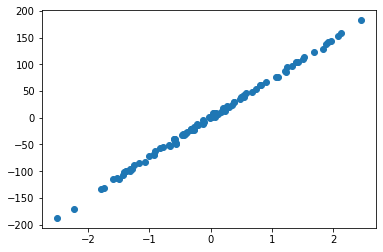

INFO:pycodestyle:1:21: W291 trailing whitespace
INFO:pycodestyle:1:21: W291 trailing whitespace
INFO:pycodestyle:1:21: W291 trailing whitespace


In [ ]:
# Generowanie danych 
x_data, y_data = make_regression(n_samples=100, n_features=1, noise=3)

plt.scatter(x_data, y_data)
plt.show()

In [ ]:
# Podział danych na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

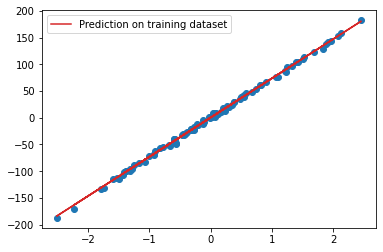

Estimated coefficients: [[73.54107828]]
Independent term: [0.26303409]


In [ ]:
# Tworzenie modelu oraz estymacja parametrów
linreg = LinearRegression().fit(x_train,
                                y_train)

y_test_predict = linreg.predict(x_test)
y_train_predict = linreg.predict(x_train).reshape(-1, 1)

plt.scatter(x_data, y_data)

# plt.plot(x_train,
#          y_train_predict,
#          color='tab:green',
#          label="Prediction on training dataset")

plt.plot(x_test, y_test_predict, color='tab:red',
         label="Prediction on training dataset")
plt.legend()
plt.show()

print(f'Estimated coefficients: {linreg.coef_}')
print(f'Independent term: {linreg.intercept_}')

# Zadanie 2

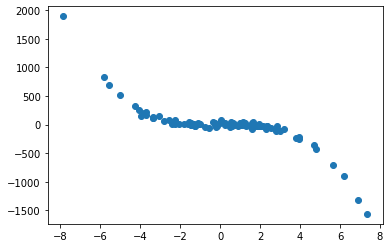

In [ ]:
def make_polynomial_regression(n_samples=100.0, noise=0.1,
                               degree=2, x_axis_span=2.5):
    """
    Funkcja generująca dane dla regresji wielomianowej.
    Funckja odpowiadająca za generowanie danych:
    -4*X^degree + 2*X + 4 + szum z rozkładu normalnego
    """
    X = x_axis_span*np.random.randn(n_samples)
    y = 4 + 2*X + (-4)*X**degree + noise*np.random.randn(n_samples)
    return X, y, degree


n = 100
noise = 30

# Generowanie danych
x_data, y_data, degree = make_polynomial_regression(n, noise, 3)

plt.scatter(x_data, y_data)
plt.show()

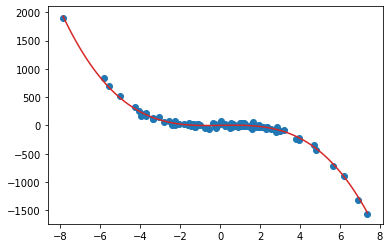

Estimated coefficients:  [-4.00510281  0.389567    5.40044684  0.71507405]


In [ ]:
# Podział danych na zbiór testowy oraz treningowy
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

# Tworzenie modelu oraz estymacja parametrów
mymodel = np.poly1d(np.polyfit(x_train, y_train, degree))

x_for_plot = np.linspace(np.min(x_data), np.max(x_data), 100)

plt.scatter(x_data, y_data)

# Predykcja
y_train_predict = mymodel(x_for_plot)

plt.plot(x_for_plot, y_train_predict, color="tab:red")

plt.show()

print(f'Estimated coefficients:  {mymodel.coefficients}')

# Zadanie 3

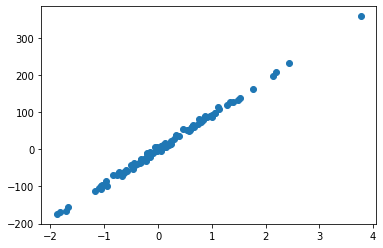

In [ ]:
# Generowanie danych
x_data, y_data = make_regression(n_samples=100, n_features=1, noise=5)

plt.scatter(x_data, y_data)
plt.show()

In [ ]:
# Podział danych na zbiór testowy oraz treningowy
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

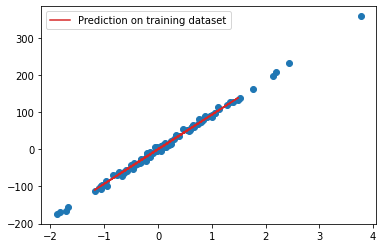

Estimated coefficients: [[93.23558846]]
Independent term: [0.43081097]


In [ ]:
# Model regresji liniowej z parametrem alpha == 1 oraz estymacja parametrów
ridge_reg = Ridge(alpha=1.0).fit(x_train, y_train)

# Predykcja
y_test_predict = ridge_reg.predict(x_test)
y_train_predict = ridge_reg.predict(x_train)

plt.scatter(x_data, y_data)

# plt.plot(x_train,
#          y_train_predict,
#          color='tab:green',
#          label="Prediction on training dataset")

plt.plot(x_test, y_test_predict, color='tab:red',
         label="Prediction on training dataset")

plt.legend()
plt.show()

print(f'Estimated coefficients: {ridge_reg.coef_}')
print(f'Independent term: {ridge_reg.intercept_}')

# Zad 3 CV

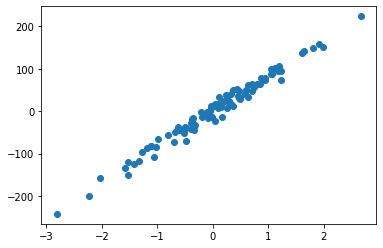

In [ ]:
# Generowanie danych 
x_data, y_data = make_regression(n_samples=100, n_features=1, noise=12)

plt.scatter(x_data, y_data)
plt.show()

In [ ]:
# Podział danych na zbioru testowe i treningowe
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
# Generowanie hiperparamteru alpha do walidacji krzyżowej
r_alphas = np.linspace(1, 7, 200)

# model z walidacją krzyżową 
ridge_model = RidgeCV(alphas=r_alphas, store_cv_values=True)

# estymacja parametrów
ridge_reg = ridge_model.fit(x_train, y_train)

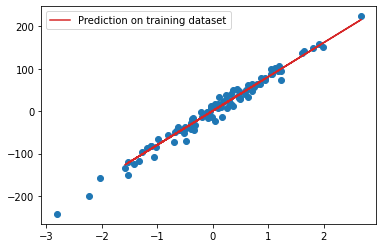

Alpha: 1.0


In [ ]:
# predykcja
y_test_predict = ridge_reg.predict(x_test)
y_train_predict = ridge_reg.predict(x_train)

plt.scatter(x_data, y_data)

# plt.plot(x_train,
#          y_train_predict,
#          color='tab:green',
#          label="Prediction on training dataset")

plt.plot(x_test, y_test_predict, color='tab:red',
         label="Prediction on training dataset")

plt.legend()
plt.show()

print(f'Alpha: {ridge_reg.alpha_}')

In [ ]:

print(f'Estimated coefficients: {ridge_reg.coef_}')
print(f'Independent term: {ridge_reg.intercept_}')

Estimated coefficients: [[80.42664406]]
Independent term: [0.9093022]
